REGULATIONATION :BIAS variance trade off

Training with weight decay = 0.0
Training with weight decay = 0.01
Training with weight decay = 0.1


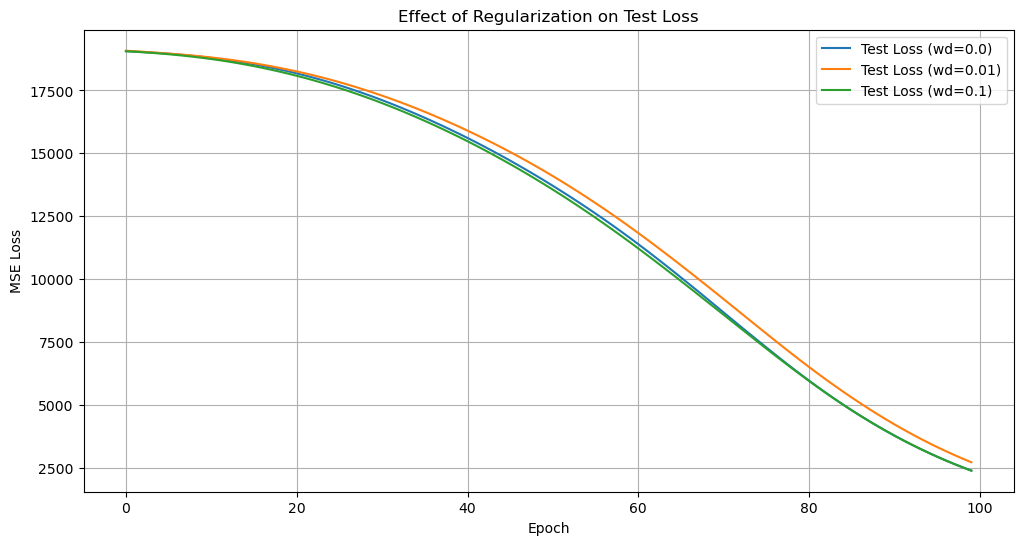

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Generate synthetic regression data
X, y = make_regression(n_samples=500, n_features=20, noise=15)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Define a simple neural network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.hidden = nn.Linear(20, 50)
        self.relu = nn.ReLU()
        self.output = nn.Linear(50, 1)

    def forward(self, x):
        return self.output(self.relu(self.hidden(x)))

def train_model(weight_decay=0.0):
    model = SimpleNN()
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=weight_decay)

    train_losses = []
    test_losses = []

    for epoch in range(100):
        model.train()
        optimizer.zero_grad()
        y_pred = model(X_train_tensor)
        loss = criterion(y_pred, y_train_tensor)
        loss.backward()
        optimizer.step()
        
        model.eval()
        with torch.no_grad():
            train_loss = criterion(model(X_train_tensor), y_train_tensor).item()
            test_loss = criterion(model(X_test_tensor), y_test_tensor).item()
            train_losses.append(train_loss)
            test_losses.append(test_loss)
    
    return train_losses, test_losses

# Compare models with different regularization strengths
weight_decays = [0.0, 0.01, 0.1]
results = {}

for wd in weight_decays:
    print(f"Training with weight decay = {wd}")
    train_losses, test_losses = train_model(weight_decay=wd)
    results[wd] = (train_losses, test_losses)

# Plotting the results
plt.figure(figsize=(12, 6))
for wd in weight_decays:
    train_losses, test_losses = results[wd]
    plt.plot(test_losses, label=f'Test Loss (wd={wd})')
plt.title("Effect of Regularization on Test Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.grid(True)
plt.show()
